#### Quantitative Analysis (task 2) On APPL

In [1]:
# import packages for analysis

import talib as ta
import pandas as pd
import matplotlib.pyplot as plt


# Find path
import os,sys
sys.path.append(os.path.abspath(os.path.join('..')))

from scripts.financial_analyzer import *

In [2]:
# read csv

AAPL_df = load_data("../data/yfinance_data/AAPL_historical_data.csv")

#### APPLE stock data

In [3]:
# Dataframe head

AAPL_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0
1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097223,48630400,0.0,0.0
1980-12-22,0.132254,0.132813,0.132254,0.132254,0.101954,37363200,0.0,0.0
1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106257,46950400,0.0,0.0
1980-12-24,0.145089,0.145647,0.145089,0.145089,0.111849,48003200,0.0,0.0


In [4]:
# Basic Statistical Analysis

AAPL_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10998 entries, 1980-12-12 to 2024-07-30
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10998 non-null  float64
 1   High          10998 non-null  float64
 2   Low           10998 non-null  float64
 3   Close         10998 non-null  float64
 4   Adj Close     10998 non-null  float64
 5   Volume        10998 non-null  int64  
 6   Dividends     10998 non-null  float64
 7   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 773.3 KB


In [5]:
# Apple stock description

AAPL_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,1.099800e+04,10998.000000,10998.000000
mean,22.299160,22.539055,22.068367,22.312754,21.494496,3.180806e+08,0.000752,0.001546
std,46.003685,46.496031,45.540929,46.037660,45.561916,3.354523e+08,0.011753,0.083663
min,0.049665,0.049665,0.049107,0.049107,0.037857,0.000000e+00,0.000000,0.000000
25%,0.299107,0.303710,0.290179,0.298549,0.241840,1.132545e+08,0.000000,0.000000
50%,0.531250,0.537946,0.522321,0.531250,0.432079,2.057412e+08,0.000000,0.000000
75%,20.204196,20.389554,19.998036,20.196160,17.253029,3.985275e+08,0.000000,0.000000
max,236.479996,237.229996,233.089996,234.820007,234.548523,7.421641e+09,0.250000,7.000000


In [6]:
AAPL_df.shape

(10998, 8)

### Technical Indicators

In [7]:
# Show technical indicators

technical_indicators(AAPL_df)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_50,RSI,MACD,MACD_Signal
Date,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,NaN,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,NaN,NaN,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,NaN,NaN,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,NaN,NaN,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,208.474199,48.687742,4.662717,6.678882
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,209.098399,47.386437,3.748082,6.092722
2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,209.709000,48.055700,3.026267,5.479431


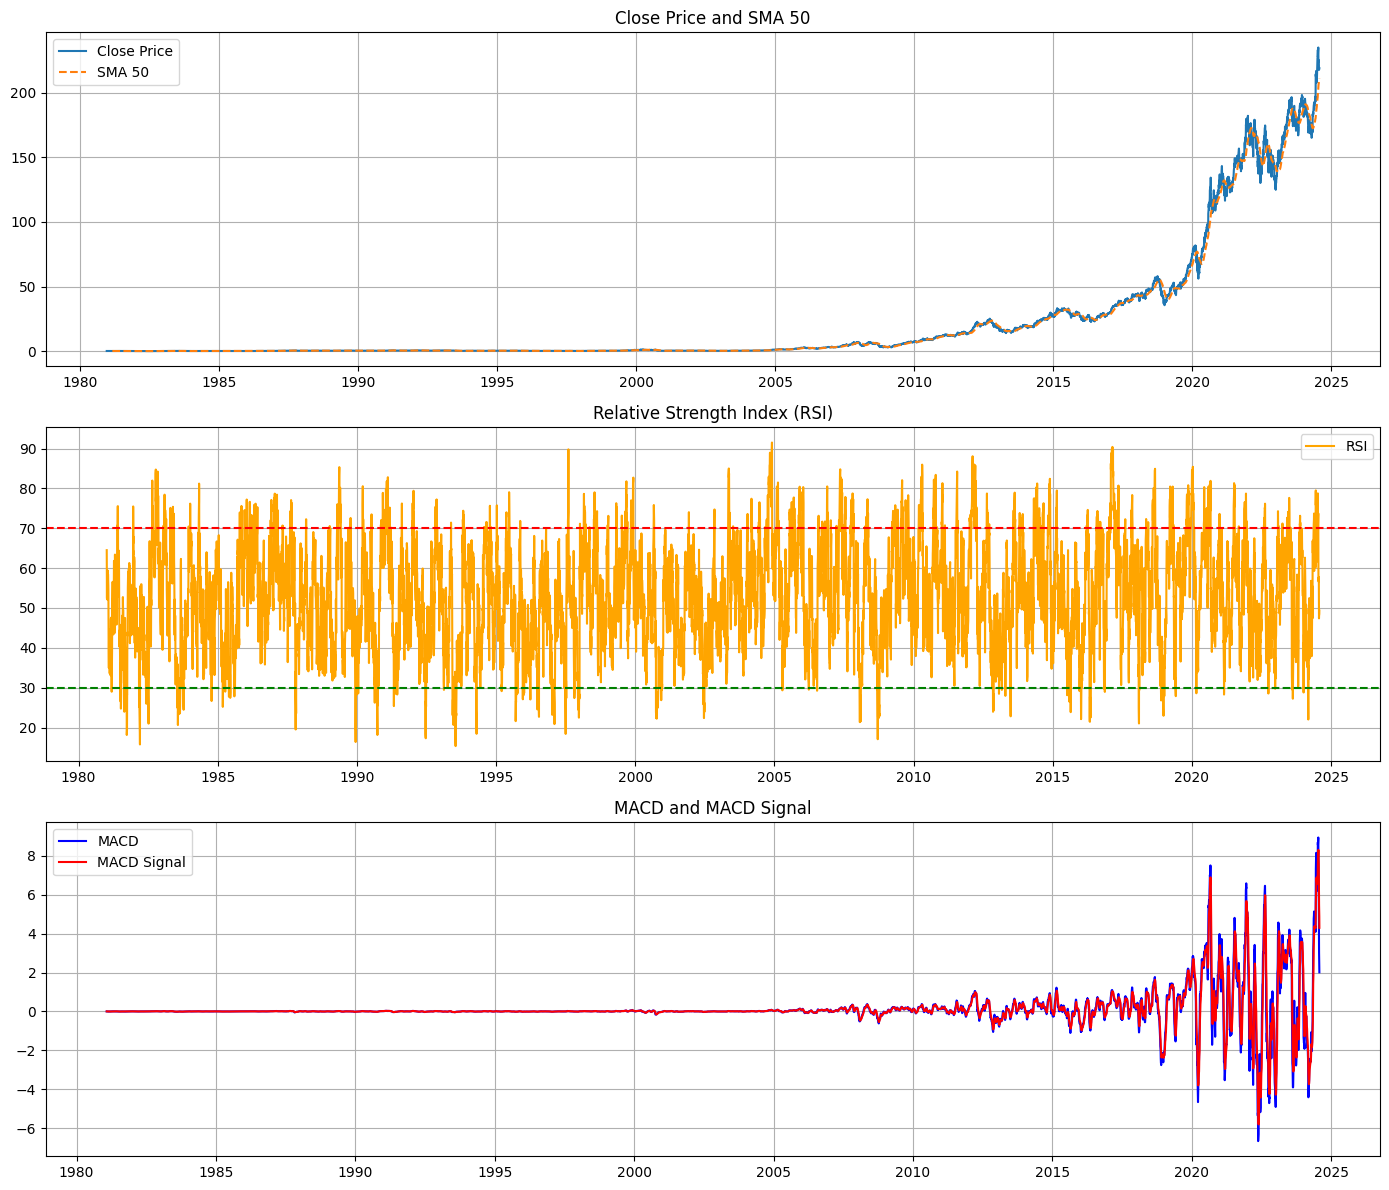

In [8]:
# Plot technical indicators

plot_technical_indicators(AAPL_df)

#### Financial Metrics

In [9]:
# Financial Metrics

calculate_financial_metrics(AAPL_df)


Daily Return Values:
            Daily_Return
Date                    
1980-12-12           NaN
1980-12-15     -0.052171
1980-12-16     -0.073398
1980-12-17      0.024751
1980-12-18      0.028992

Cumulative Return Values:
            Cumulative_Return
Date                         
1980-12-12                NaN
1980-12-15          -0.052171
1980-12-16          -0.121739
1980-12-17          -0.100001
1980-12-18          -0.073909

Volatility Values:
            Volatility
Date                  
1980-12-12         NaN
1980-12-15         NaN
1980-12-16         NaN
1980-12-17         NaN
1980-12-18         NaN


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_50,RSI,MACD,MACD_Signal,Daily_Return,Cumulative_Return,Volatility
Date,,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,NaN,NaN,NaN,-0.052171,-0.052171,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,NaN,NaN,NaN,-0.073398,-0.121739,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,NaN,NaN,NaN,0.024751,-0.100001,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,NaN,NaN,NaN,0.028992,-0.073909,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,208.474199,48.687742,4.662717,6.678882,-0.028754,2205.187813,0.017010
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,209.098399,47.386437,3.748082,6.092722,-0.004805,2194.588126,0.016555
2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,209.709000,48.055700,3.026267,5.479431,0.002161,2199.332786,0.016543


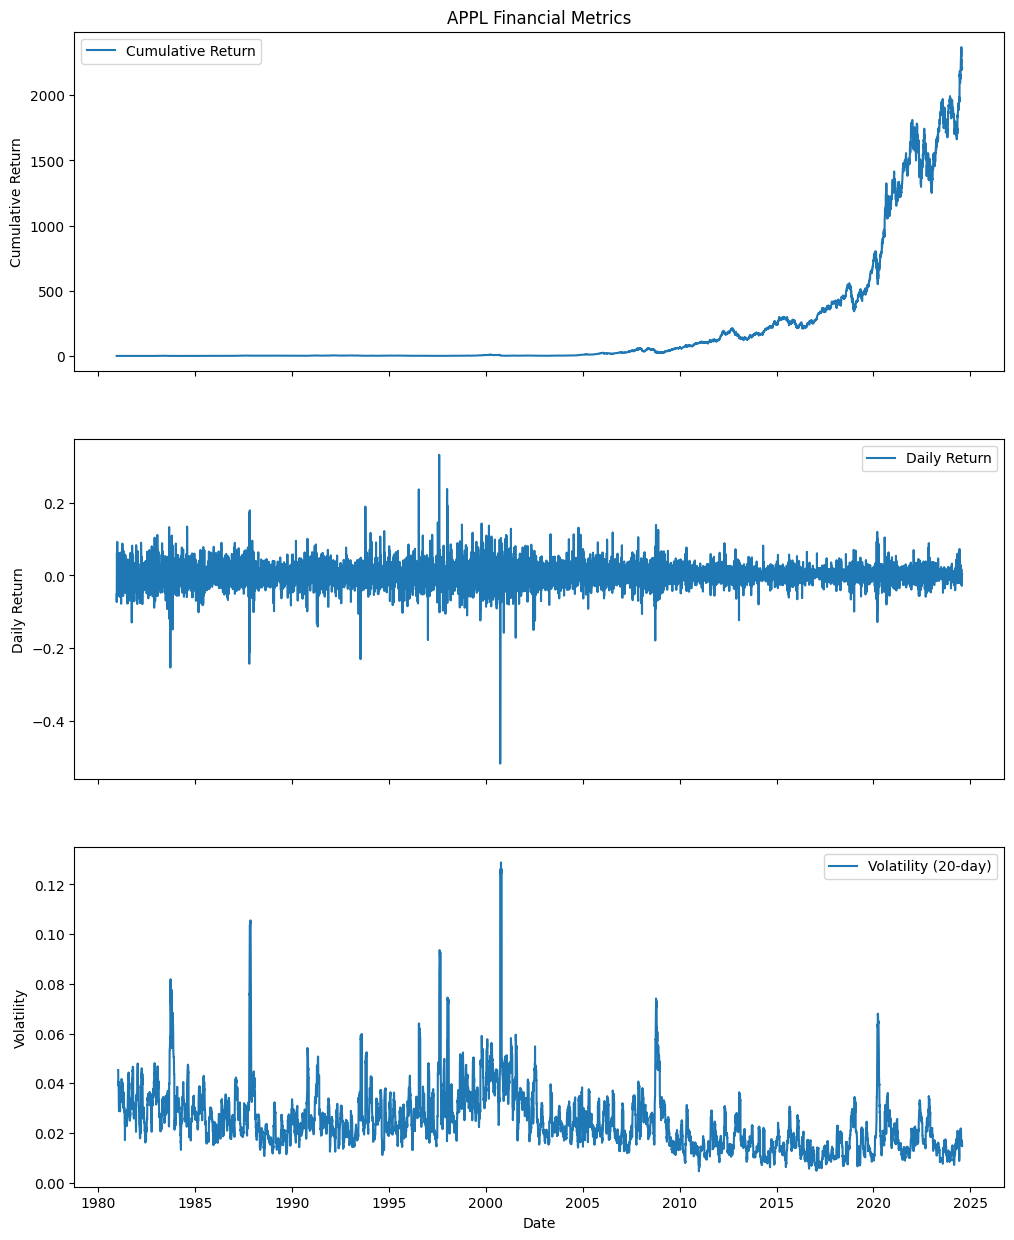

In [10]:
# Plot financial metrics

plot_financial_metrics(AAPL_df, 'APPL')

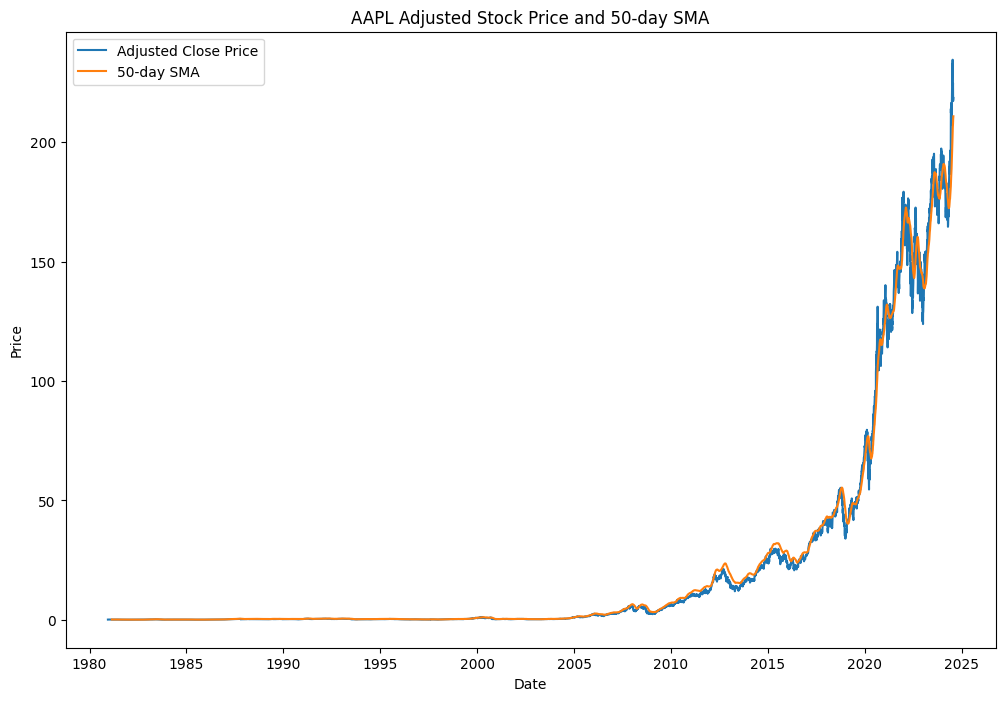

In [11]:
# Plot stock data

plot_stock_data(AAPL_df,'AAPL')

/home/brook/Music/taliber/dummy/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


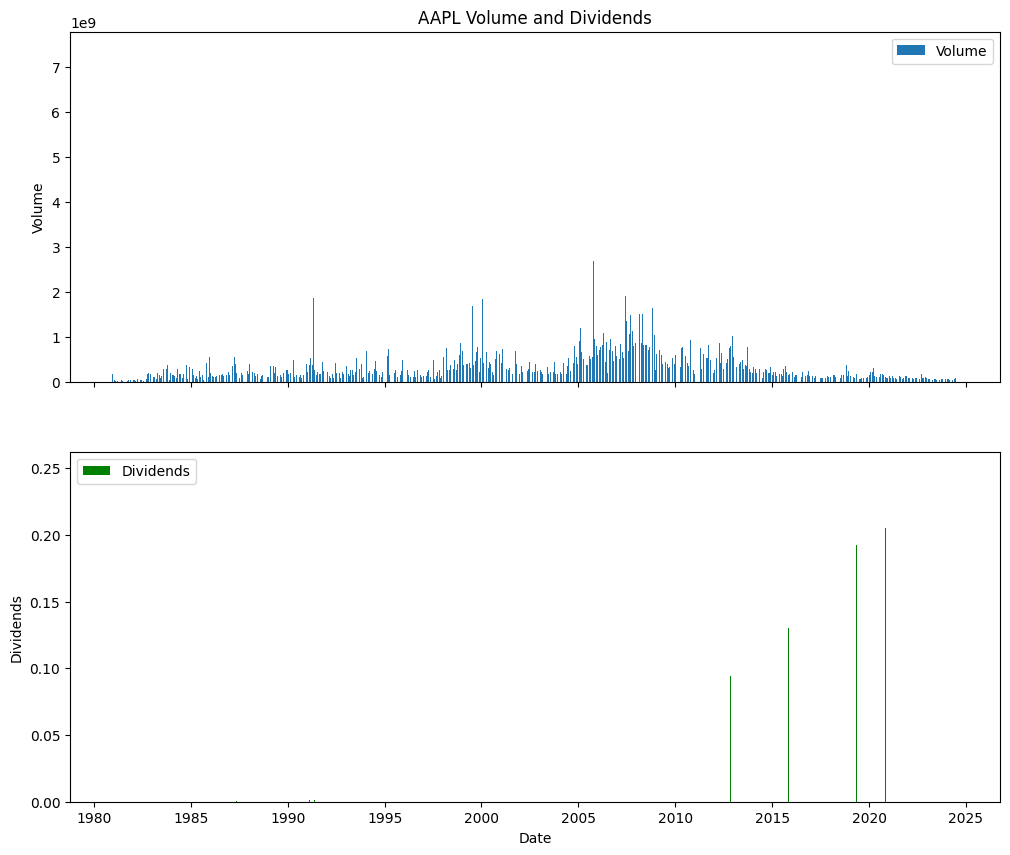

In [12]:
# Volume vs Divident

plot_volume_and_dividends(AAPL_df,'AAPL')

In [13]:
print(AAPL_df.describe())

               Open          High           Low         Close     Adj Close  \
count  10998.000000  10998.000000  10998.000000  10998.000000  10998.000000   
mean      22.299160     22.539055     22.068367     22.312754     21.494496   
std       46.003685     46.496031     45.540929     46.037660     45.561916   
min        0.049665      0.049665      0.049107      0.049107      0.037857   
25%        0.299107      0.303710      0.290179      0.298549      0.241840   
50%        0.531250      0.537946      0.522321      0.531250      0.432079   
75%       20.204196     20.389554     19.998036     20.196160     17.253029   
max      236.479996    237.229996    233.089996    234.820007    234.548523   

             Volume     Dividends  Stock Splits        SMA_50           RSI  \
count  1.099800e+04  10998.000000  10998.000000  10949.000000  10984.000000   
mean   3.180806e+08      0.000752      0.001546     21.923676     53.119636   
std    3.354523e+08      0.011753      0.083663    

In [14]:
# Stock anlysis

print("\nAverage Daily Return:", AAPL_df['Daily_Return'].mean())
print("Total Cumulative Return:", AAPL_df['Cumulative_Return'].iloc[-1])
print("Average Volatility:", AAPL_df['Volatility'].mean())
print("Total Dividends Paid:", AAPL_df['Dividends'].sum())
print("Number of Stock Splits:", AAPL_df['Stock Splits'].sum())


Average Daily Return: 0.0010960408314183133
Total Cumulative Return: 2207.812751027257
Average Volatility: 0.02489237996552221
Total Dividends Paid: 8.273564
Number of Stock Splits: 17.0
